**INTRODUCTION**

- This is a machine learning project for heart disease prediction
- This project aims to compare the performance of different classiication models using train test split and cross validation techniques.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


**LOADING THE DATASET**

In [20]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

In [6]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**PREPROCESSING**

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [22]:
X = df.drop('target', axis=1)
y = df['target']

In [23]:
cat_col = []
for col in df.columns:
    unique_val = df[col].nunique()
    if unique_val < 10:
        print(col, unique_val)
        cat_col.append(col)


sex 2
cp 4
fbs 2
restecg 3
exang 2
slope 3
ca 5
thal 4
target 2


In [24]:
print(cat_col)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [25]:
for col in cat_col:
    print(df[col].value_counts())

sex
1    713
0    312
Name: count, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
fbs
0    872
1    153
Name: count, dtype: int64
restecg
1    513
0    497
2     15
Name: count, dtype: int64
exang
0    680
1    345
Name: count, dtype: int64
slope
1    482
2    469
0     74
Name: count, dtype: int64
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64
target
1    526
0    499
Name: count, dtype: int64


This shows the unique values of categorical variables and we can see that these are imbalanced and need to be encoded

**VISUALIZATION**

<Axes: xlabel='target', ylabel='count'>

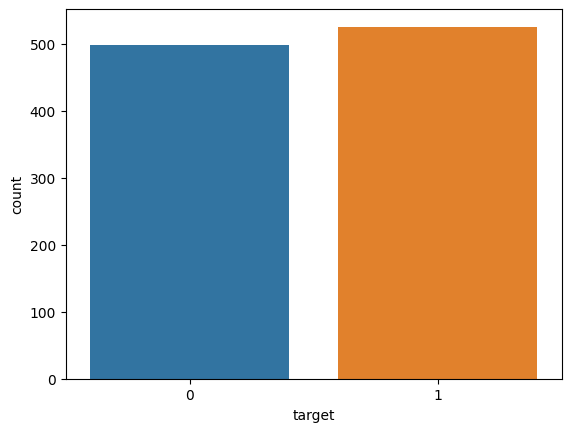

In [30]:
sns.countplot(data = df, x = y)

In [26]:
cat_col.remove('target')
X = pd.get_dummies(X, columns=cat_col, drop_first=True)

In [15]:
df.shape

(1025, 23)

In [19]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,True,True,False,False,...,True,False,True,False,False,False,False,False,True,False
1021,60,125,258,141,2.8,0,True,False,False,False,...,True,True,False,True,False,False,False,False,False,True
1022,47,110,275,118,1.0,0,True,False,False,False,...,True,True,False,True,False,False,False,False,True,False
1023,50,110,254,159,0.0,1,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


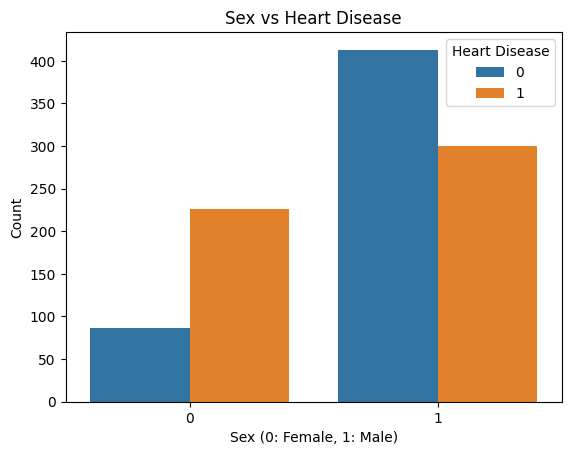

In [37]:
sns.countplot(x='sex', hue='target', data=df)
plt.title("Sex vs Heart Disease")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
plt.legend(title='Heart Disease')
plt.show()


The above plot shows that females are more likely to have a heart disease than men for this particular dataset

<Axes: xlabel='age', ylabel='Count'>

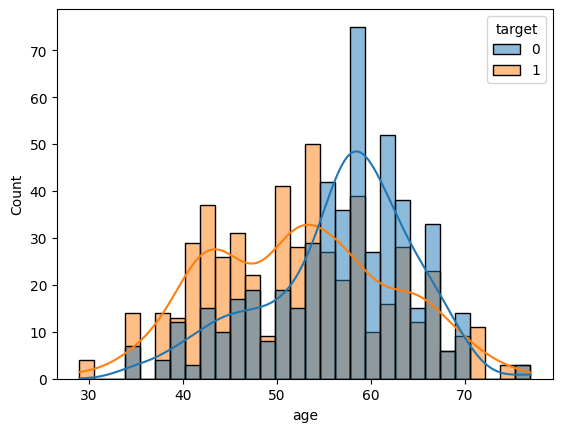

In [45]:
sns.histplot(data=df, x='age', hue='target', kde=True, bins=30)

The above plot shows the distribution of age vs target and we can see that the younger individuals appear to have high risk of heart disease

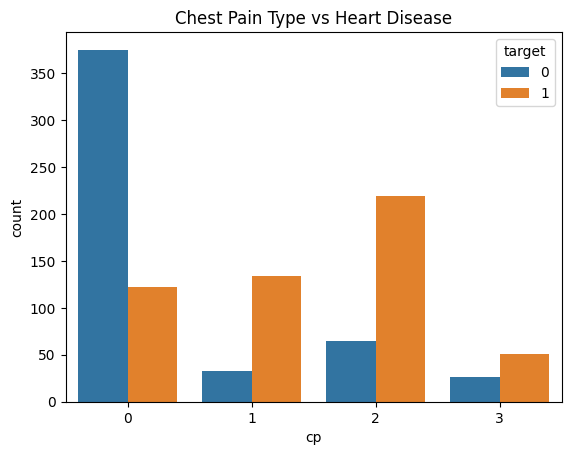

In [34]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

The above plot is a countplot of cp vs target and chest pain with value 1 appears to have high risk of heart disease.

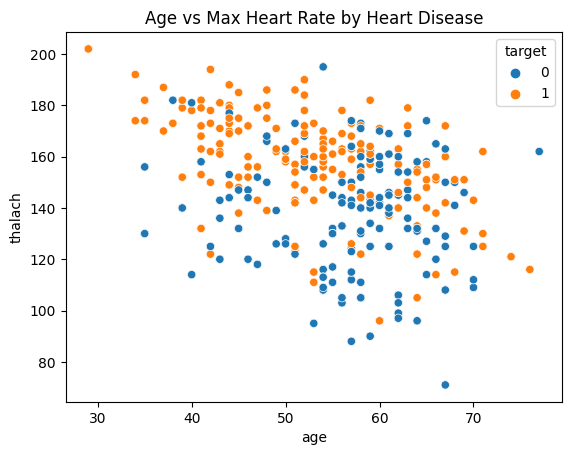

In [18]:
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title('Age vs Max Heart Rate by Heart Disease')
plt.show()

**NORMALIZING THE NUMERIC VALUES**

In [65]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(numeric_cols)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')


**SPLITTING THE DATASET**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**MODELING**

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [112]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

**EVALUATION**

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

def model_evaluation(models, X_train, X_test, y_train, y_test, X_full, y_full):
    for name, model in models.items():
        print(name)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        cv_scores = cross_val_score(model, X_full, y_full, cv=5, scoring='accuracy')
        print("Test Accuracy: ", acc )
        print("F1 Score: ", f1)
        print("Cross Validation Accuracy", cv_scores.mean())
        print("-" * 30)


In [114]:
model_evaluation(models, X_train_scaled, X_test_scaled, y_train, y_test, X, y)

Logistic Regression
Test Accuracy:  0.848780487804878
F1 Score:  0.8502415458937199
Cross Validation Accuracy 0.8634146341463416
------------------------------
KNN
Test Accuracy:  0.8292682926829268
F1 Score:  0.8309178743961352
Cross Validation Accuracy 0.744390243902439
------------------------------
Decision Tree
Test Accuracy:  1.0
F1 Score:  1.0
Cross Validation Accuracy 0.9853658536585366
------------------------------
Random Forest
Test Accuracy:  1.0
F1 Score:  1.0
Cross Validation Accuracy 0.9912195121951219
------------------------------
SVM
Test Accuracy:  0.9170731707317074
F1 Score:  0.9137055837563451
Cross Validation Accuracy 0.711219512195122
------------------------------
Naive Bayes
Test Accuracy:  0.8146341463414634
F1 Score:  0.8155339805825244
Cross Validation Accuracy 0.8341463414634147
------------------------------


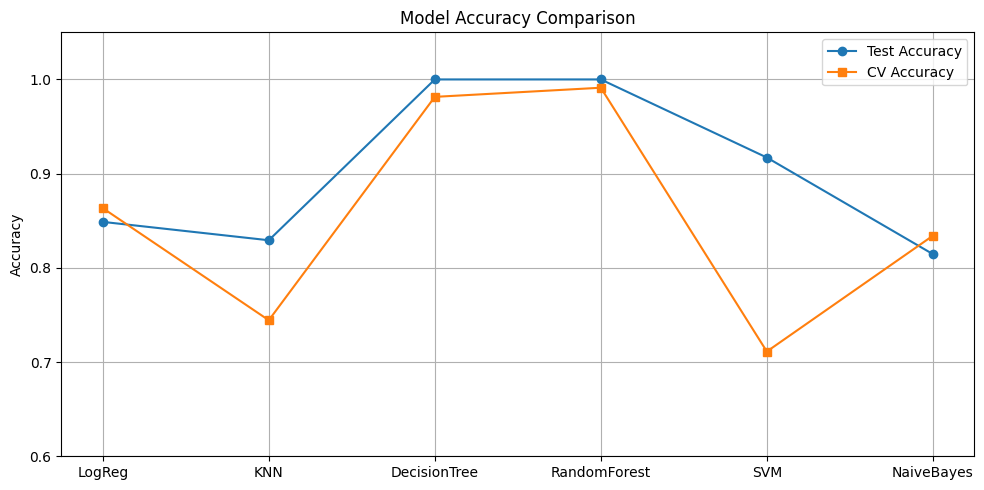

In [116]:
models = ['LogReg', 'KNN', 'DecisionTree', 'RandomForest', 'SVM', 'NaiveBayes']
test_scores = [0.8488, 0.8293, 1.0, 1.0, 0.9171, 0.8146]
cv_scores = [0.8634, 0.7444, 0.9815, 0.9912, 0.7112, 0.8341]
plt.figure(figsize=(10, 5))
plt.plot(models, test_scores, marker='o', label='Test Accuracy')
plt.plot(models, cv_scores, marker='s', label='CV Accuracy')

plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.6, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


 **According to the results we can conclude that logistic regression performs well compared to other models** 